In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataAir_newavg.csv',usecols=[0,1,2,3,4,5,6,7,8,9],parse_dates=['date'], skipinitialspace=True)
data

,date,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
1,2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2,2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
3,2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
4,2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1765 non-null   int64         
 2   co                1765 non-null   float64       
 3   no2               1765 non-null   float64       
 4   pm25              1708 non-null   float64       
 5   avgT              1695 non-null   float64       
 6   humid             1765 non-null   int64         
 7   pressure-monthly  1765 non-null   float64       
 8   windDir           1735 non-null   float64       
 9   windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 138.0 KB


In [7]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
1,2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2,2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
3,2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
4,2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0


In [8]:
y_col='pm25'

In [9]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
1,2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2,2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
3,2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
4,2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1703,2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
1704,2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
1705,2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0
1706,2022-10-30,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0


In [10]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [11]:
date_parts(data)

In [12]:
data

,date,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd,year,month,day,day_name
0,2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0,2018,1,1,Monday
1,2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0,2018,1,2,Tuesday
2,2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0,2018,1,3,Wednesday
3,2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0,2018,1,4,Thursday
4,2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN,2018,1,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0,2022,10,27,Thursday
1704,2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0,2022,10,28,Friday
1705,2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0,2022,10,29,Saturday
1706,2022-10-30,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0,2022,10,30,Sunday


In [13]:
data.columns

Index(['date', 'pm10', 'co', 'no2', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [14]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2018-01-01,2018,1,1,Monday,21.0
1,2018-01-02,2018,1,2,Tuesday,26.0
2,2018-01-03,2018,1,3,Wednesday,38.0
3,2018-01-04,2018,1,4,Thursday,39.0
4,2018-01-05,2018,1,5,Friday,51.0
...,...,...,...,...,...,...
1703,2022-10-27,2022,10,27,Thursday,14.0
1704,2022-10-28,2022,10,28,Friday,17.0
1705,2022-10-29,2022,10,29,Saturday,18.0
1706,2022-10-30,2022,10,30,Sunday,29.0


In [15]:
df=df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2018-01-01,2018,1,1,Monday,21.0
2018-01-02,2018,1,2,Tuesday,26.0
2018-01-03,2018,1,3,Wednesday,38.0
2018-01-04,2018,1,4,Thursday,39.0
2018-01-05,2018,1,5,Friday,51.0
...,...,...,...,...,...
2022-10-27,2022,10,27,Thursday,14.0
2022-10-28,2022,10,28,Friday,17.0
2022-10-29,2022,10,29,Saturday,18.0


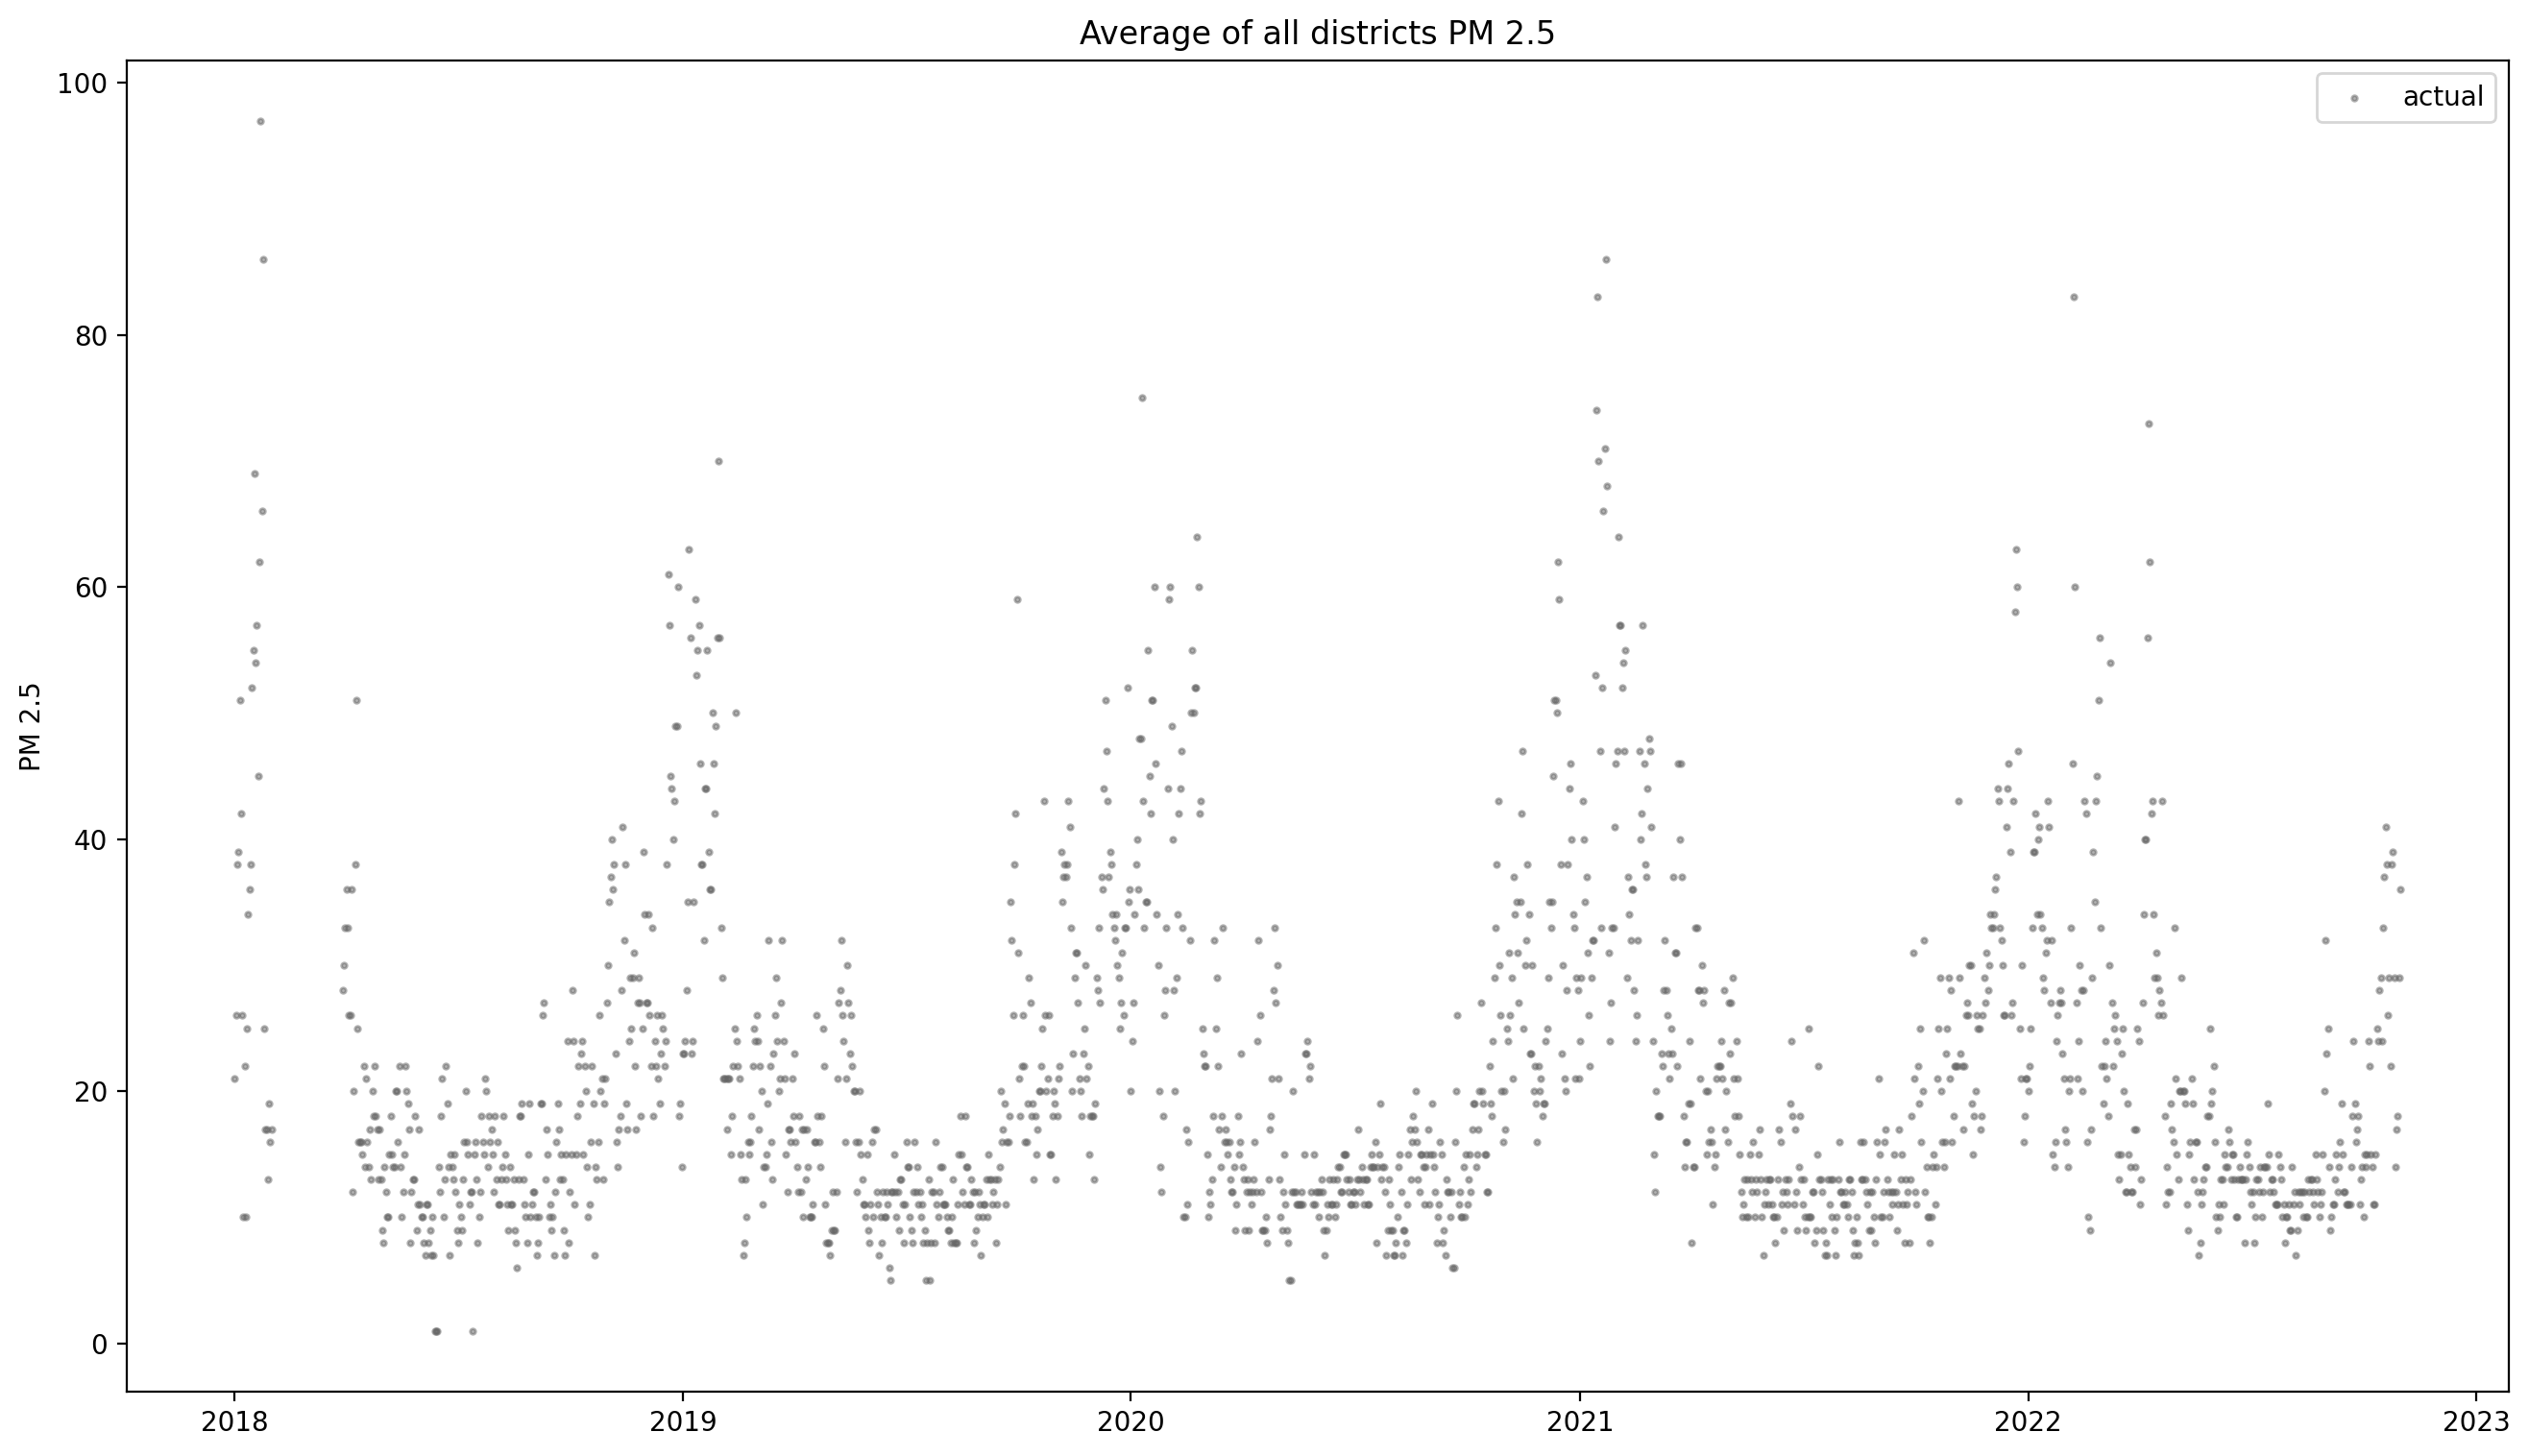

In [16]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Average of all districts PM 2.5')
plt.legend();

In [17]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [18]:
split_at = 900
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [19]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [20]:
reg = lgb.LGBMRegressor()

In [21]:
reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [22]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [23]:
fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 95.8273
[20]	valid_0's l2: 89.7792
[30]	valid_0's l2: 90.5287
[40]	valid_0's l2: 92.9895
[50]	valid_0's l2: 94.3804
[60]	valid_0's l2: 95.1664
[70]	valid_0's l2: 96.234
[80]	valid_0's l2: 96.8872
[90]	valid_0's l2: 97.5141
[100]	valid_0's l2: 98.0577


LGBMRegressor()

In [24]:
reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7f5bc5c77190>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [147.43773710507503,
                 134.96281307384896,
                 125.03276604771834,
                 117.21688566734122,
                 111.21882794223758,
                 107.05379524293772,
                 103.16829101383202,
                 100.29171239841136,
                 97.83876767067085,
                 95.82728342336281,
                 94.37172176420394,
                 93.02421797828276,
                 92.24934

In [25]:
reg.score(X_train, y_train)

0.6382489782294243

In [26]:
reg.score(X_test, y_test)

0.4444302927798125

In [27]:
reg.predict(X_test)

array([12.97480341, 12.9307403 , 13.0901781 , 13.03367961, 13.17413473,
       13.54244206, 14.66388532, 15.26740028, 14.68372127, 14.94153769,
       13.91661311, 13.39264608, 12.65575871, 13.10075439, 13.10118715,
       12.82150418, 13.02585423, 13.60516764, 13.73099041, 14.01827153,
       13.62419319, 13.70871142, 14.02102583, 13.83113773, 13.83113773,
       14.04608717, 14.06673975, 13.68217789, 13.69602255, 14.06673975,
       13.76187239, 14.15902735, 14.20295364, 14.82646459, 14.59828317,
       15.47912561, 17.42386089, 20.18706982, 20.91781621, 20.92098856,
       20.38562112, 24.81911105, 24.79725921, 23.39034768, 24.88767177,
       24.88767177, 24.90673902, 20.41132008, 20.29790089, 20.18064822,
       20.68045091, 19.71386162, 19.53621462, 20.00912777, 20.68045091,
       20.36435143, 20.33240623, 20.68045091, 18.76114938, 18.76114938,
       19.22323903, 19.86318452, 19.39303594, 19.61825775, 19.93027364,
       20.36348632, 22.21597874, 23.78118618, 23.6799921 , 24.06

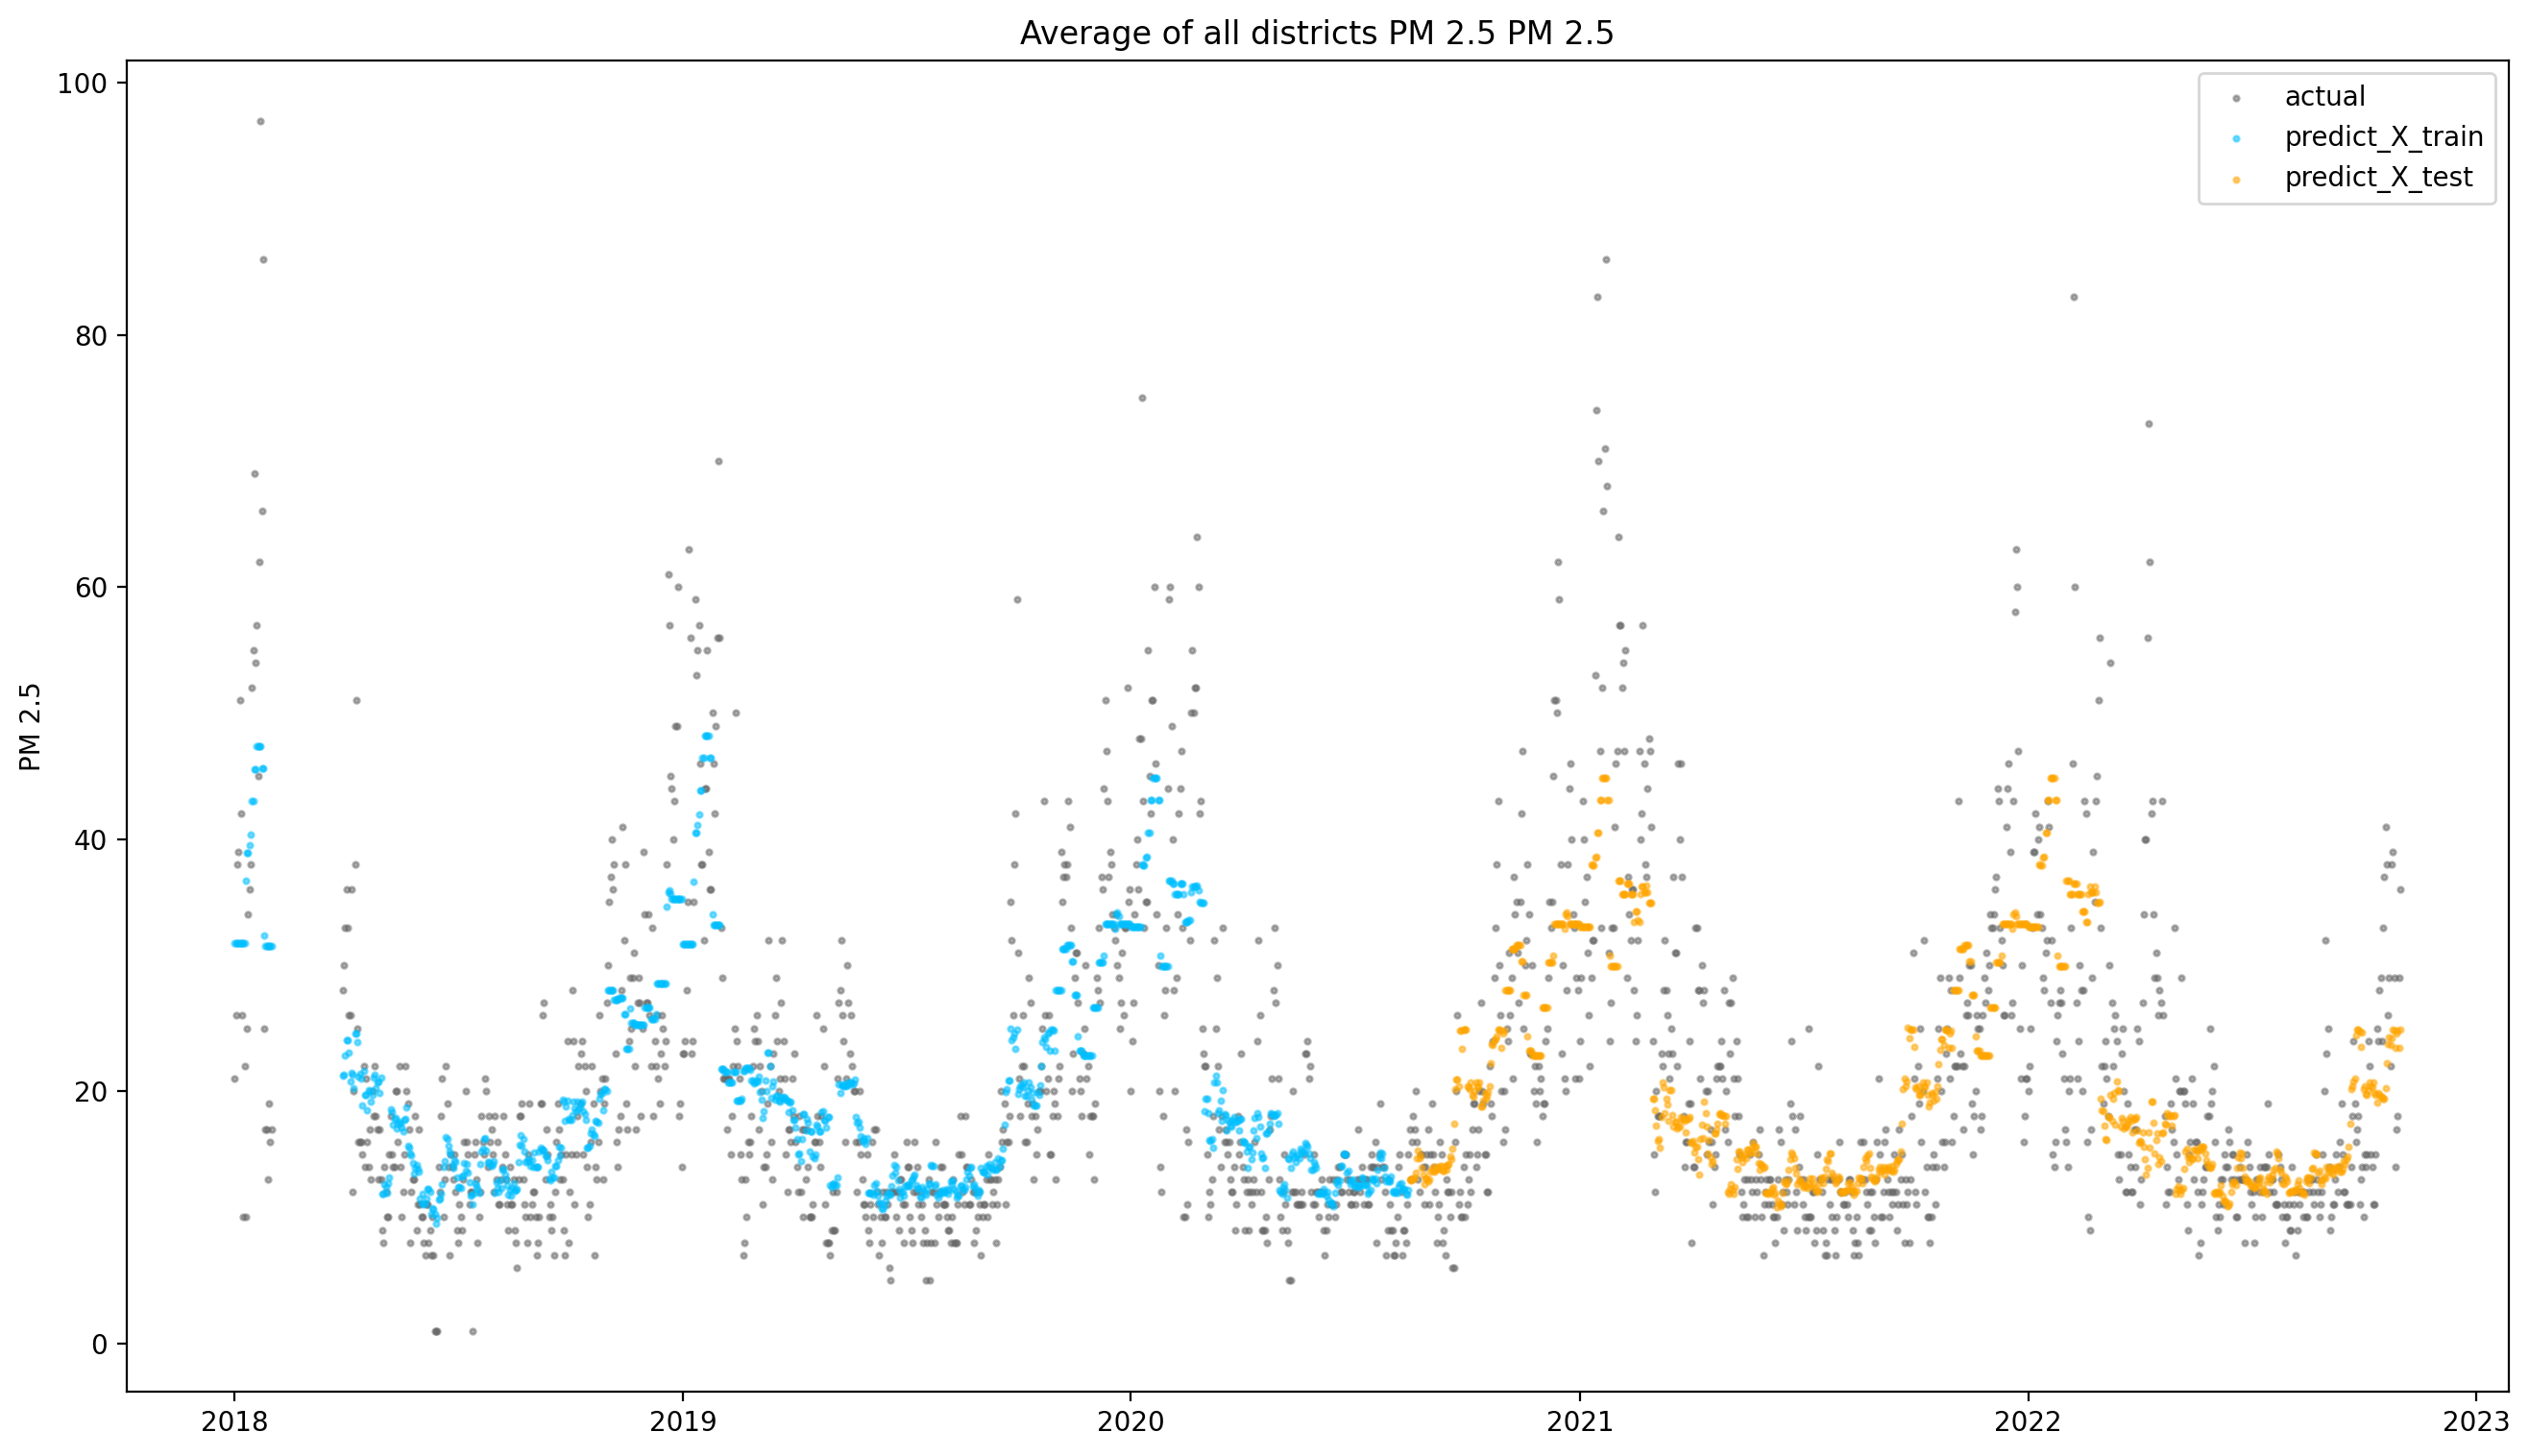

In [28]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Average of all districts PM 2.5 PM 2.5')
plt.legend();

In [29]:
df.head(3000)

,year,month,day,day_name,pm25
date,,,,,
2018-01-01,2018,1,1,Monday,21.0
2018-01-02,2018,1,2,Tuesday,26.0
2018-01-03,2018,1,3,Wednesday,38.0
2018-01-04,2018,1,4,Thursday,39.0
2018-01-05,2018,1,5,Friday,51.0
...,...,...,...,...,...
2022-10-27,2022,10,27,Thursday,14.0
2022-10-28,2022,10,28,Friday,17.0
2022-10-29,2022,10,29,Saturday,18.0


In [30]:
yhat=[]

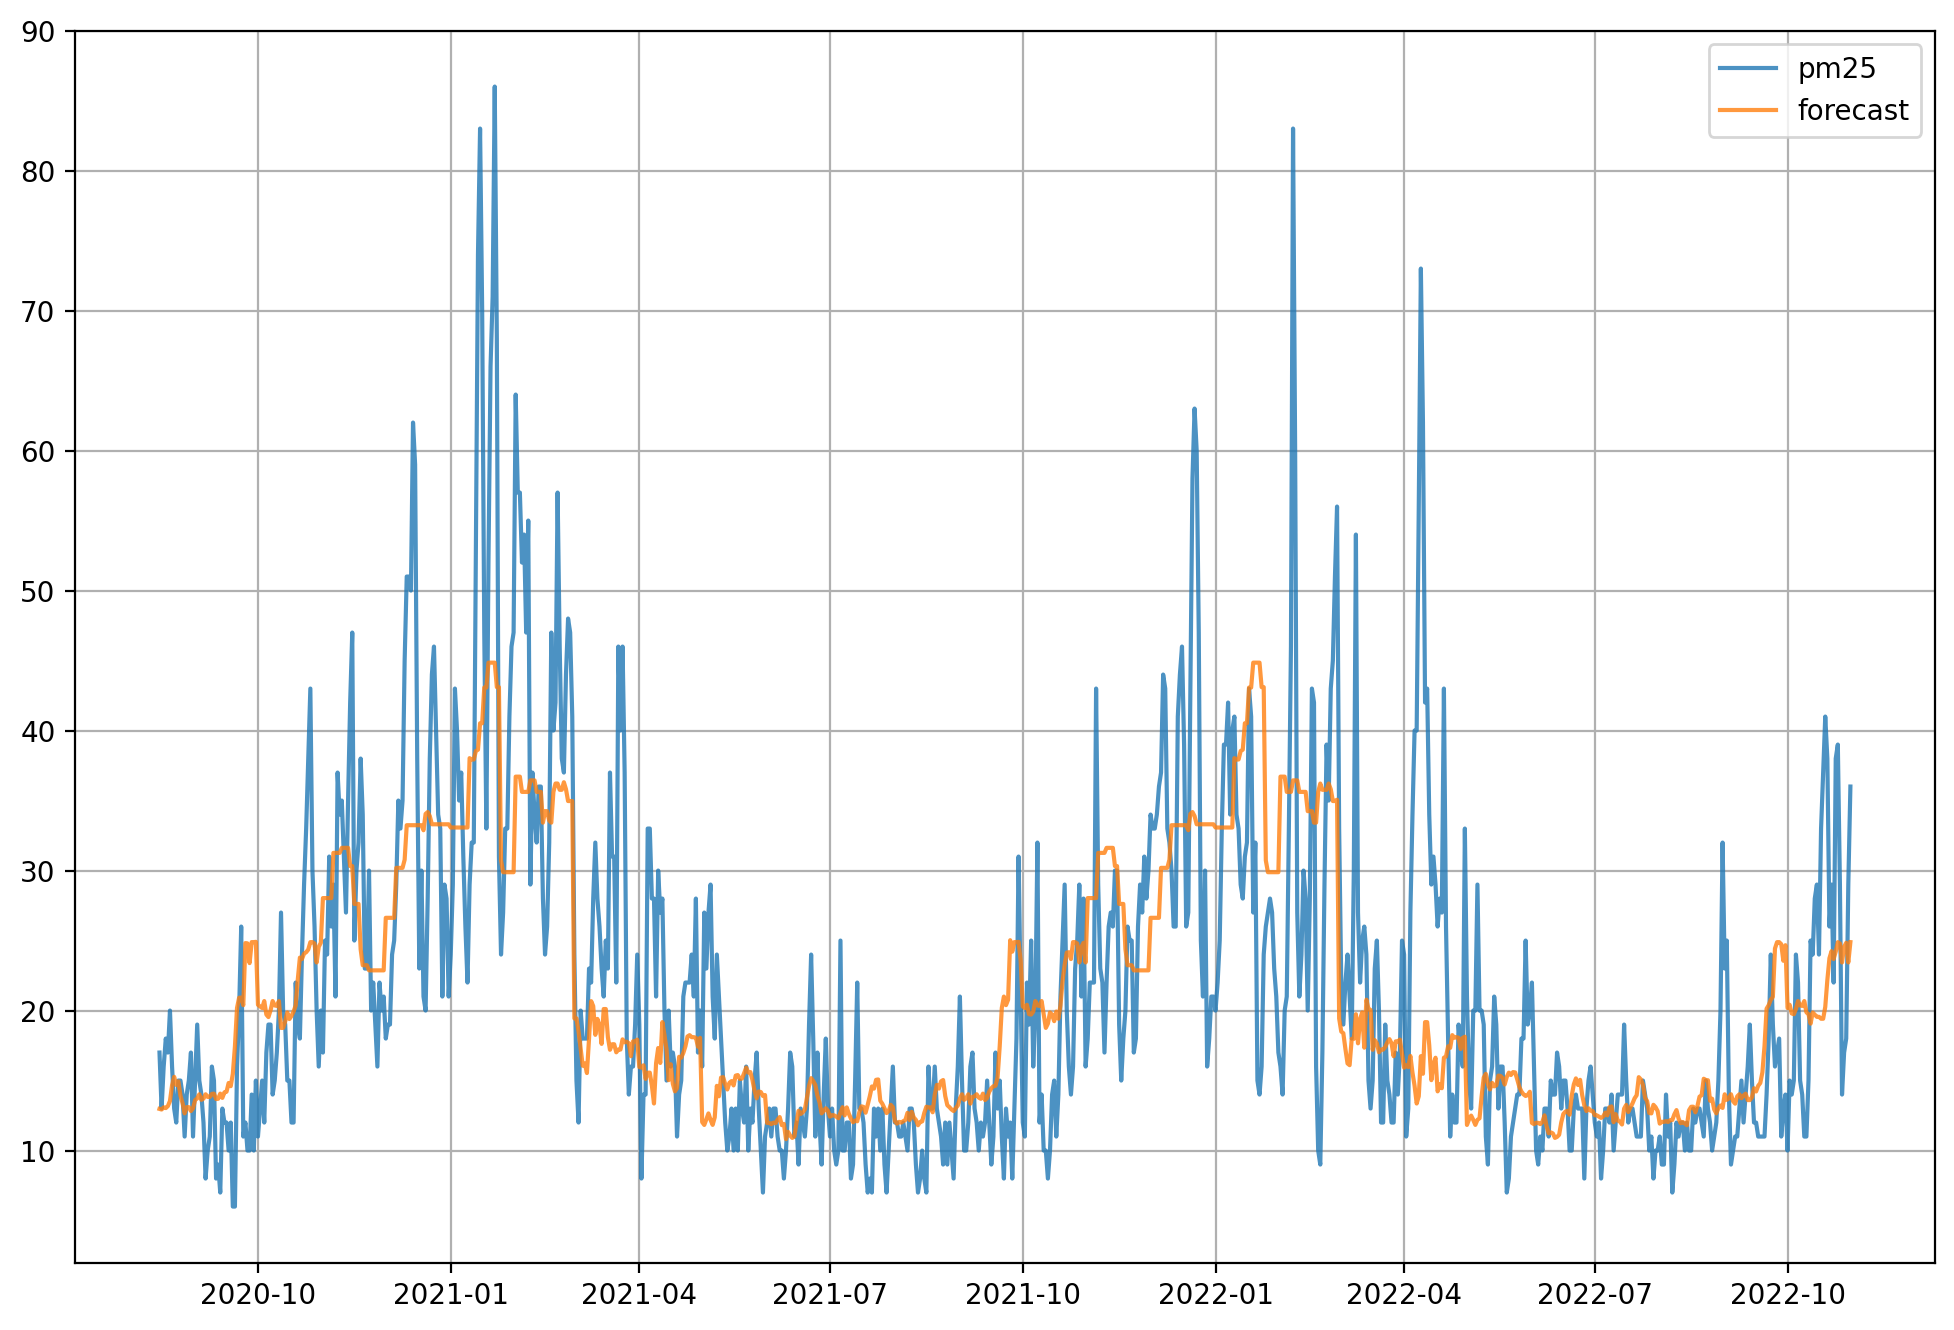

In [31]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [32]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(7)
ypred


,พยากรณ์ PM2.5
0,12.974803
1,12.930740
2,13.090178
3,13.033680
4,13.174135
5,13.542442
6,14.663885


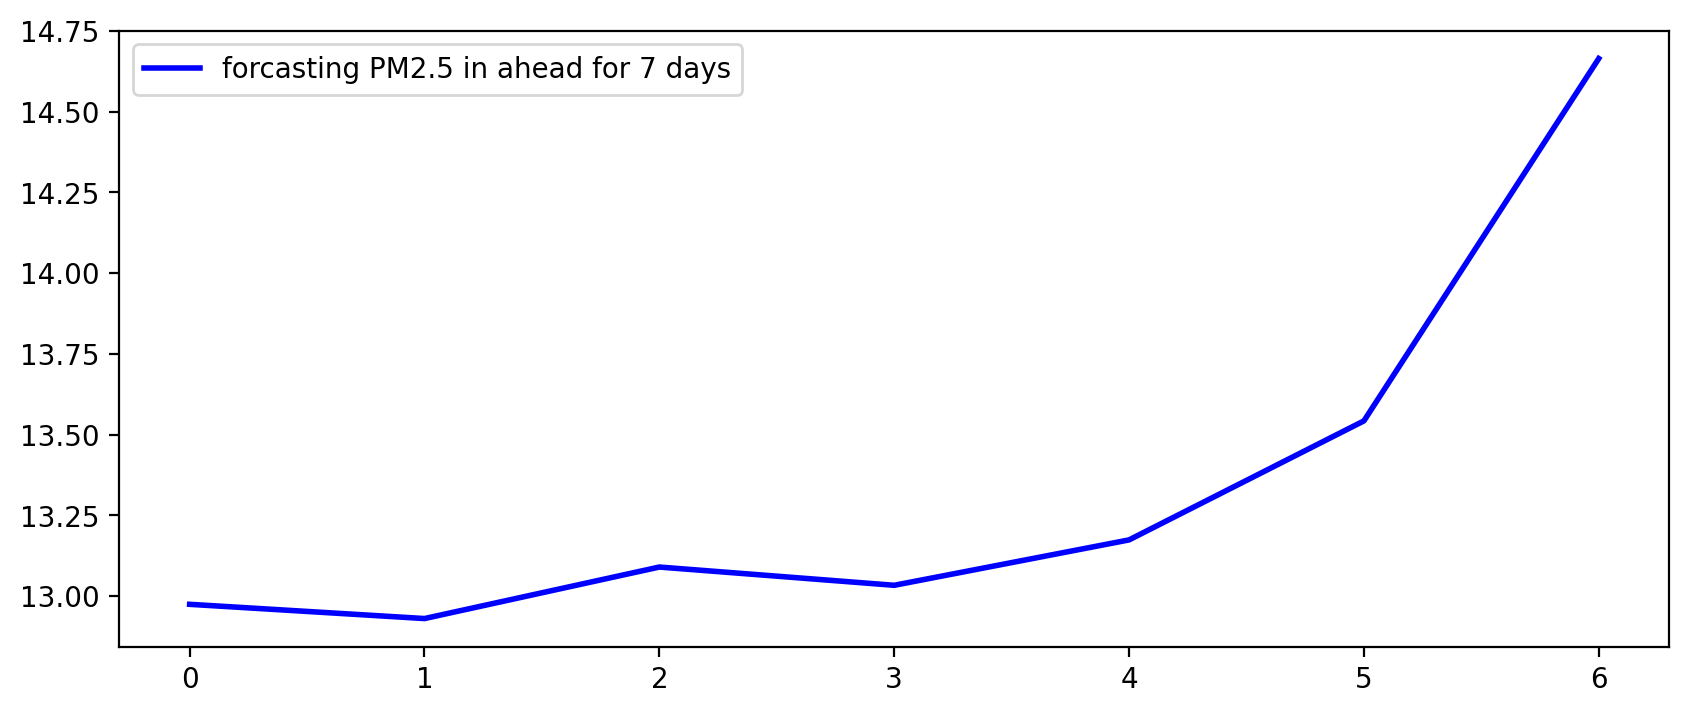

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(ypred, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [34]:
Y_pred=reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_pred,y_test)
print('MSE',mse)
rmse = np.sqrt(mse)
print('RMSE',rmse)

MSE 89.69760930708763
RMSE 9.470882182093051
